In [130]:
import csv
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
import custom_classes as cc

In [138]:
reload(cc)

<module 'custom_classes' from '/home/quantumfox/JupyterWorkfolder/Py3/tf_workbench/ANN/custom_classes.py'>

In [127]:
%cd ..

/home/quantumfox/JupyterWorkfolder/Py3/tf_workbench/ANN


In [65]:
np.set_printoptions(precision=3, suppress=True, linewidth=75)

In [2]:
src_data = np.array([])
with open('../data_ANN_full.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        src_data = np.append(src_data, row)

src_data = src_data.astype(float)
src_data = src_data.reshape(23, 20045)

src_data_names = np.array([])
with open('../data_ANN_full_names.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        src_data_names = np.append(src_data_names, row)

data_dict = dict(zip(src_data_names, src_data))

In [3]:
data_2d = np.vstack((
    data_dict['T0cp'][data_dict['MainGenPower']>0],
    data_dict['B'][data_dict['MainGenPower']>0],
    data_dict['GT1'][data_dict['MainGenPower']>0],
    data_dict['MainGenPower'][data_dict['MainGenPower']>0],
    data_dict['OutputPower'][data_dict['MainGenPower']>0],
    data_dict['TurbineExitTemp'][data_dict['MainGenPower']>0],
    data_dict['EngineSpeed'][data_dict['MainGenPower']>0],)).T

In [177]:
col = 3
bins = 7
count = 1000
_, datawidth = data_2d.shape
data_2d = np.random.permutation(data_2d)
datamin, datamax = (data_2d[:, col].min(), data_2d[:, col].max())
databins = [np.array([]),]*bins
step = (datamax - datamin)/bins
cur = 0
threshold = []
for _ in range(bins):
    threshold.append(cur)
    cur = cur + step
threshold = threshold[::-1]
for item, pos in zip(data_2d[:, col], range(data_2d[:, col].size)):
    for dbin, thr in zip(range(bins), threshold):
        if item > thr:
            if len(databins[dbin]) >= count:
                break
            else:
                databins[dbin] = np.append(databins[dbin], data_2d[pos])
                binlen = databins[dbin].size
                databins[dbin] = databins[dbin].reshape(int(binlen/datawidth), datawidth)
                break

res = np.array([])
for dbin in databins:
    res = np.append(res, dbin)
reslen = res.size
res = res.reshape(int(reslen/datawidth), datawidth)

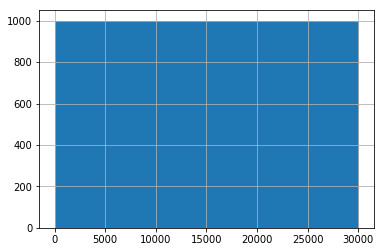

In [178]:
plt.figure()
plt.hist(res[:,3], threshold[::-1])
plt.grid()
plt.show()

In [179]:
sw = cc.StatWorker(data_2d)

In [180]:
sw.uniformize_2d(7,3)

In [181]:
sw.get_data().shape

(700, 7)

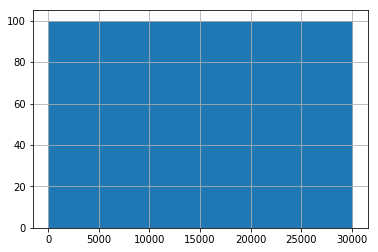

In [182]:
plt.figure()
plt.hist(sw.get_data()[:,3], threshold[::-1])
plt.grid()
plt.show()

In [183]:
learnset_uniform = sw.get_data()

In [184]:
learnset_uniform

array([[    13.6  ,     99.8  ,      8.3  , ...,  27246.   ,    593.1  ,
         94308.   ],
       [    13.8  ,     99.8  ,      9.   , ...,  32569.   ,    593.7  ,
         96320.   ],
       [    15.8  ,     99.   ,      8.7  , ...,  29641.   ,    593.2  ,
         96320.   ],
       ..., 
       [    14.633,     99.6  ,      0.   , ...,    566.   ,    625.6  ,
         45262.   ],
       [    15.5  ,     98.9  ,      0.   , ...,   -264.   ,    462.3  ,
         45134.   ],
       [    14.467,     99.6  ,      0.   , ...,   -363.   ,    435.1  ,
         45078.   ]])

In [185]:
with open('data_m_uniform.csv', 'w') as datafile:
    writer = csv.writer(datafile)
    writer.writerows(learnset_uniform)